In [1]:
import numpy as np
import scipy.linalg as slin
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
LuminositeAmbiante = [1,1,1,1,1,14,14,14,14,14,47,47,47,47,47]
LuminositeLed = [0,30,90,160,255,0,60,110,180,255,0,75,120,180,255]
Total = [1,4,15,27,41,14,22,29,39,52,47,55,61,69,78]

In [3]:
data = np.c_[LuminositeAmbiante, LuminositeLed, Total]
mn = np.min(data, axis=0)
mx = np.max(data, axis=0)
X, Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))

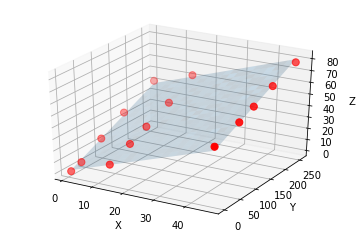

Surface = 0.906570 * LumAmb + 0.144826 * LumLed + 1.108136
Residual = 35.880056


In [4]:
A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
C, r, _, _ = slin.lstsq(A, data[:,2])
Z = C[0]*X + C[1] * Y + C[2]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
plt.show()

print("Surface = %f * LumAmb + %f * LumLed + %f" % (C[0], C[1], C[2]))
print("Residual = %f" % r)